##날씨 좋은 월요일 오후 세시. 자전거 타는 사람은 몇 명?

개발환경


load_diabetes
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 전처리
<br/>데이터 분리
<br/>모델 구성
<br/>모델 학습
<br/>시각화

Forecast use of a city bikeshare system
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 전처리
<br/>데이터 분리
<br/>모델 구성
<br/>모델 학습
<br/>시각화

결론
<br/>참고문헌

#개발 환경

In [ ]:
import pandas as pd                                         
import numpy as np                                           
import matplotlib.pyplot as plt  
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'                            
import seaborn as sns        
from pandas.plotting import scatter_matrix                                     

pandas는 데이터를 구조화된 형식으로 가공 및 분석할 수 있도록 자료구조를 제공하는 패키지이다.

numpy는 수치 행렬을 계산한다.

matplotlib과 seaborn은 데이터 시각화를 한다.        

pandas.plotting은 산점도 행렬을 시각화한다.

In [ ]:
from sklearn.model_selection import train_test_split        
from sklearn.linear_model import LinearRegression            
from sklearn.metrics import mean_squared_error              

sklearn.model_selection은 train, text 데이터를 분리한다.

sklearn.linear_model은 Linear Regression을 한다. 

sklearn.metrics은 평균제곱오차(MSE)를 구한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'seaborn=','sklearn=']
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)
        library_version.append('    ')

f.close()

import sys
print(sys.version)
print()

for i in range(0, len(library_version) - 1, 6):
  print(str(library_version[i : i+6]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='') 
  if i % 6 == 0:
    print()

for i in range(len(library_version) - 1):
  if (i-1) % 6 == 0 and i == len(library_version) - 6:
    print(str(library_version[-1]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

matplotlib==3.2.2      numpy==1.21.6      pandas==1.3.5     
seaborn==0.11.2      sklearn==0.0      sklearn-pandas==1.8.0     


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#load_diabetes

##데이터 정보

[sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)


##데이터 탐색

In [ ]:
from sklearn.datasets import load_diabetes              
diabetes = load_diabetes()

데이터셋 diabetes에는 data, target, data_filename, data_module, feature_names, frame, target, target_filename까지
<br/>총 8개의 정보가 담겨져있다.

In [ ]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<br/>비만 환자 442명을 대상으로
나이, 성별, 체질량지수(BMI), 평균 혈압, 혈액 관련 6가지 지표를 측정했다.
<br/>

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)  
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


<br/>총 442개의 데이터가 각각 10개의 정보를 담고 있다.


In [ ]:
diabetes_df[0:1]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646


0번 index에 위치한 데이터의 정보이다.
<br/>비만 환자 442명의 나이, 체질량지수(BMI), 평균 혈압, 혈액 관련 6가지 지표가
<br/>절댓값 0과 1사이로 소수점 6자리로 담겨있다.

In [ ]:
diabetes_df = diabetes_df.loc[:, ["age", "bmi",	"bp",	"s1",	"s2",	"s3",	"s4",	"s5",	"s6"]]
diabetes_df

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


산점도 행렬을 출력하기 앞서서 데이터프레임에서 문자열 자료형인 성별은 제외한다.

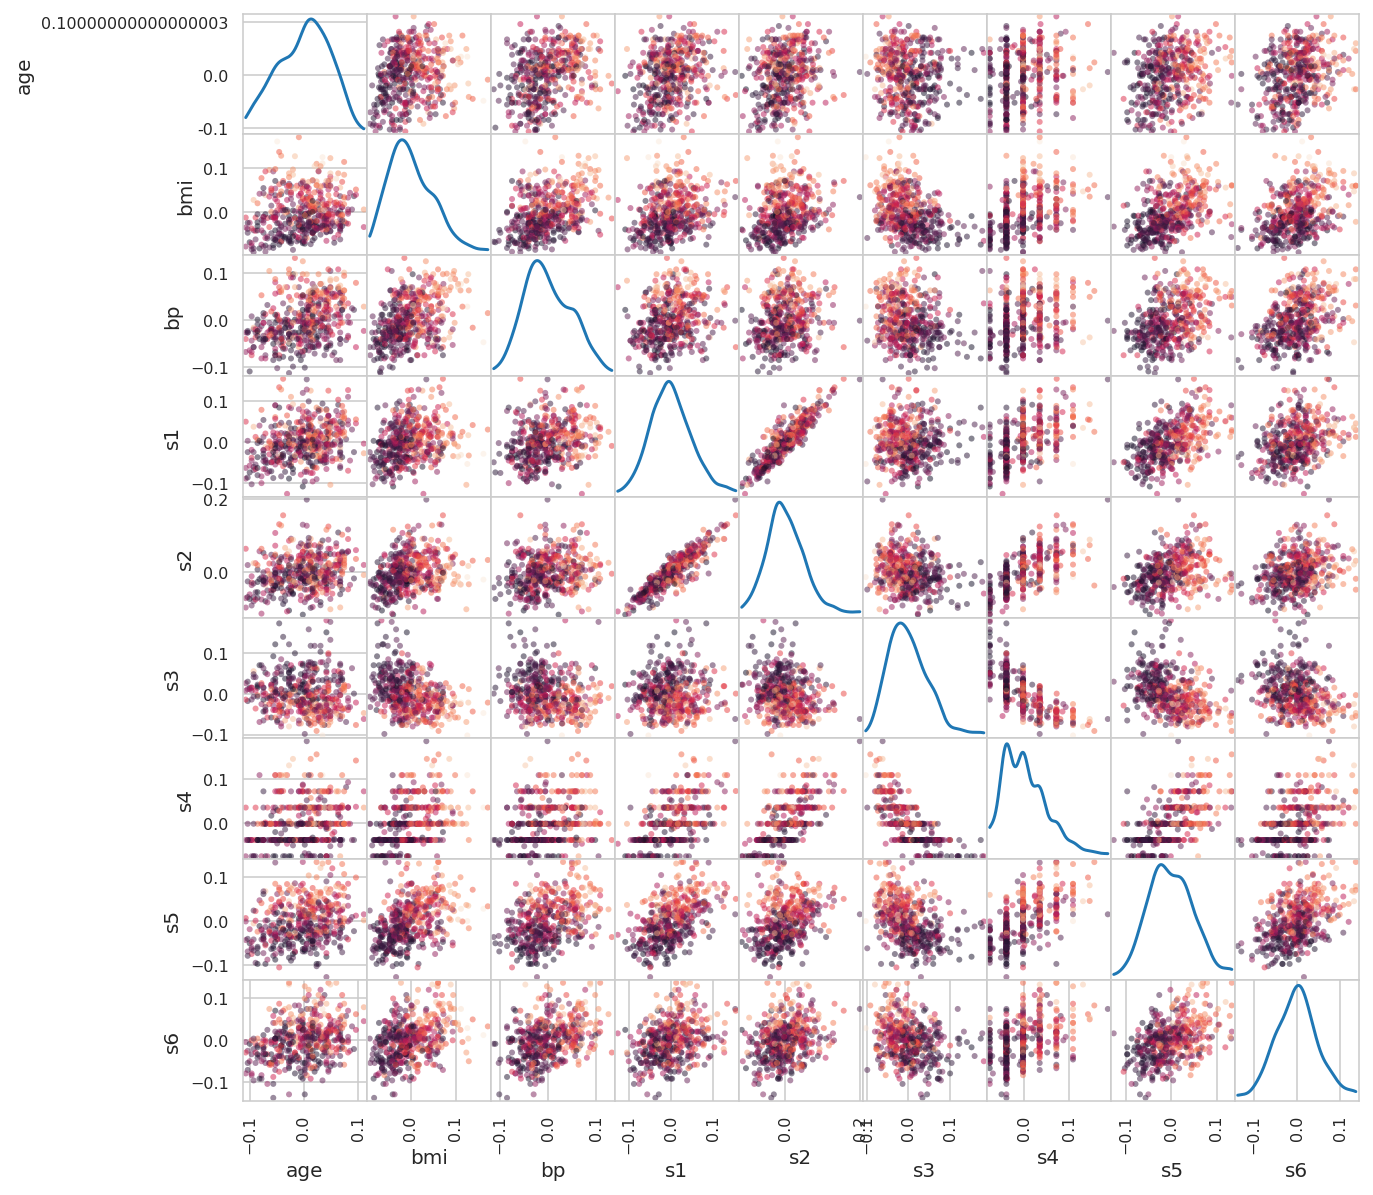

In [ ]:
scatter_matrix(diabetes_df,
               c = diabetes['target'],
               alpha=0.5, 
               figsize=(10, 10), 
               diagonal='kde')
plt.show()

<br/>산점도 행렬에서 각 속성의 상관관계를 유추해본다.
<br/>

In [ ]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

diabetes의 data를 df_X에, target을 df_y에 할당한다

In [ ]:
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
df_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


##데이터 전처리

In [ ]:
X = df_X.values
y = df_y['target'].values

df_X, df_y에 있는 값들을 numpy array로 변환한다.

In [ ]:
type(df_X.values)

numpy.ndarray

In [ ]:
type(df_y['target'].values)

numpy.ndarray

type 함수를 이용해 numpy array로 변환했는지 확인한다.

<br/>**[생각]**
<br/>type 함수는 코드 진행 여부를 확인할 수 있는 디버깅 역할을 한다.
<br/>어떤 부분에서 변수의 자료형끼리 충돌이 일어났는지 호환성의 문제를 확인할 수 있게 한다.
<br/>print 함수도 디버깅 역할을 하는 대표적인 함수이다.
<br/>
<br/>**[디버깅]**
<br/>np.array 함수를 이용할 때 Gradient 함수에서 dW, db 부분의 충돌이 있어서 실행 오류가 있었다.
<br/>np.array 이전에 .values을 입력하여 이미 numpy array로 변환을 했었기 때문에 <br/>array 변환 과정이 중복되었기 때문에 에러가 발생한 것으로 보인다.

##데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


입력 데이터와 정답 데이터로 구성하여
<br/>random state으로 데이터를 무작위로 정렬하고
<br/>전체의 20%를 시험 데이터로 사용한다.

##모델 구성

In [ ]:
W = np.random.rand(10)
b = np.random.rand()

입력 데이터 개수에 맞는 가중치 W와 b 설정
<br/>길이가 10인 W와 1개의 숫자인 b를 할당한다.

In [ ]:
W1 = W
W1

array([0.16673705, 0.30346457, 0.13645158, 0.04701109, 0.43199686,
       0.78545153, 0.66299616, 0.08086682, 0.11669902, 0.37039013])

w에 랜덤한 값으로 w1부터 w10까지 저장한다.

변수 초기화에 사용할 W1를 저장한다.

In [ ]:
b1 = b
b1

0.8894140737546476

b에 랜덤한 값으로 상수가 저장한다.

변수 초기화에 사용할 b1를 저장한다.

In [ ]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

가중치에 대한 일차함수를 정의한다.
<br/>y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + w10x10 + b
<br/>for문을 이용하여 10개의 가중치 w와 변수 x의 곱을 만들고 끝에 상수 b를 더한다.

In [ ]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

손실함수를 MSE 함수로 정의하기 위해서는
먼저 MSE 함수를 정의한다.
<br/>변수 두 값의 차이에 대한 제곱의 평균을 MSE라고 한다.

In [ ]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

가중치에 대한 일차함수와 결합하여
<br/>정답과 예측값 간의 차이에 대한 제곱의 평균 MSE를 정의한다.

In [ ]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

손실함수는 최적을 찾고자 하는 매개변수를 구하기 위한 수식이다.
<br/>정답과 예측값 간의 차이가 최소롤 줄어드는 지점을 알기 위해서는
<br/>손실함수를 미분해야 한다.
<br/>학습을 통한 오차 개선 과정이 기하학적으로 경사하며 감소하는 지점을 나타내는 것이 Gradient 함수이다.

##모델 학습

In [ ]:
learning_rate = []
learning_range = np.arange(0.0001, 0.1002, 0.0001)
for learning_rates in learning_range:
  learning_rate.append(round(learning_rates, 4))

학습률을 0.0부터 0.1까지 0.0001 간격으로 리스트에 1001개의 값을 저장한다.

**[생각]**
<br/>학습률은 왜 1보다 작은 소수점일까?
<br/>학습률이 클수록 최적화된 결과가 나올까?

In [ ]:
print(W1)
print(b1)

[0.16673705 0.30346457 0.13645158 0.04701109 0.43199686 0.78545153
 0.66299616 0.08086682 0.11669902 0.37039013]
0.8894140737546476


In [ ]:
#매번 실행될 때마다 똑같은 값이 나와야하기 때문에 초기화값을 설정한다.
losses = []
losses_as_learningrate = []

#위에서 np.random.rand()에 의해 설정된 초기화값이다.
W1 = [0.16673705, 0.30346457, 0.13645158, 0.04701109, 0.43199686, 0.78545153,
 0.66299616, 0.08086682, 0.11669902, 0.37039013]
b1 = 0.8894140737546476

#학습률 리스트는 [0.0, 0.0001, 0.0002, ..., 0.1]으로 1~1001번째 인덱스를 불러온다.
for n in range(0, 1000):

#1000번을 학습시킨다.
#0번째에는 값을 초기화시키고 1번째부터는 학습을 시작한다.
#1001번째에는 1000번째 학습 결과를 저장하는 단계이다.
  for i in range(0, 1002):

#n번 인덱스에 위치한 학습률을 적용한 학습 결과이다.
#학습률 리스트 [0.0, 0.0001, 0.0002, ..., 0.1]
    for j in range(n, n+1):

      #초기화를 한다.
      if n >= 0 and i == 0:
        W = W1
        b = b1

      #1000번째까지 학습을 한다.
      if n >= 0 and i >= 1:
        dW, db = gradient(X_train, W, b, y_train)
        W -= learning_rate[j] * dW
        b -= learning_rate[j] * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)

        #0번째 학습률에서 500배수 번째 학습한 결과 출력하기
        if j == 0 and i % 500  ==  0:
          print('Iteration %d : Loss %0.4f Learning Rate %0.4f' % (i, L, learning_rate[j]))

        #100배수+1 번째 학습률에서 500배수 번째 학습한 결과 출력하기
        elif (j+1) % 100 == 0 and i % 500  ==  0:
          print('Iteration %d : Loss %0.4f Learning Rate %0.4f' % (i, L, learning_rate[j]))

        #1001번째 : 1000번째(마지막) 학습 결과 저장  
        elif i == 1001:
          losses_as_learningrate.append(losses[-2])

Iteration 500 : Loss 23856.6734 Learning Rate 0.0001
Iteration 1000 : Loss 20480.4043 Learning Rate 0.0001
Iteration 500 : Loss 3171.7052 Learning Rate 0.0100
Iteration 1000 : Loss 2972.8061 Learning Rate 0.0100
Iteration 500 : Loss 2972.6823 Learning Rate 0.0200
Iteration 1000 : Loss 2917.7902 Learning Rate 0.0200
Iteration 500 : Loss 2928.8473 Learning Rate 0.0300
Iteration 1000 : Loss 2912.9253 Learning Rate 0.0300
Iteration 500 : Loss 2917.7643 Learning Rate 0.0400
Iteration 1000 : Loss 2911.4437 Learning Rate 0.0400
Iteration 500 : Loss 2914.3473 Learning Rate 0.0500
Iteration 1000 : Loss 2910.3568 Learning Rate 0.0500
Iteration 500 : Loss 2912.9206 Learning Rate 0.0600
Iteration 1000 : Loss 2909.3558 Learning Rate 0.0600
Iteration 500 : Loss 2912.0816 Learning Rate 0.0700
Iteration 1000 : Loss 2908.3927 Learning Rate 0.0700
Iteration 500 : Loss 2911.4425 Learning Rate 0.0800
Iteration 1000 : Loss 2907.4578 Learning Rate 0.0800
Iteration 500 : Loss 2910.8817 Learning Rate 0.0900
I

1000번 학습을 시켜 최적의 손실함수 값을 찾는 기울기 모델이다.
<br/>for문에 의해서 학습횟수(i), learning_rate(j)에 따라
<br/>차례대로 losses 리스트에 loss가 저장된다.
<br/>print문에 의해서 학습횟수(10의 배수), loss(소수점 4자리수), Learning Rate(소수점 2자리수)가 출력된다.
<br/>0.0부터 0.1까지 0.0001 간격으로 있는 학습률에 대한 손실함수값을 저장한다.

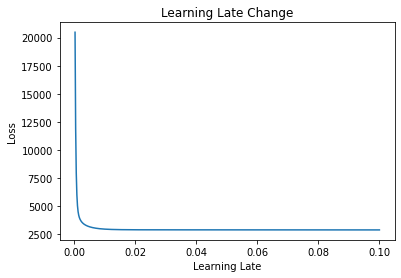

In [ ]:
x_values = learning_rate[1:1001]	    
y_values = losses_as_learningrate[:]	
plt.plot(x_values, y_values)	        
plt.title('Learning Late Change')    
plt.xlabel("Learning Late")           
plt.ylabel("Loss")                    
plt.show()

Learning Rate가 (0.0, 0.1)구간에서 가장 큰 0.1일 때 
Loss값이 작다.

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('Loss %0.2f' % (mse))

Loss 2840.38


test 데이터의 loss값은 2840.38이다.

##시각화

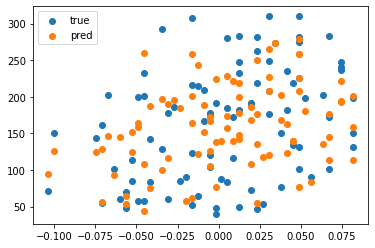

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

산점도는 데이터의 분포를 보여준다.
<br/>정답 데이터와 예측 데이터 분포 사이의 유사도를 파악한다.

#Forecast use of a city bikeshare system

##데이터 정보

[Kaggle Data : Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)

자전거 키오스크 대여 서비스에 기록된 도시 위치 정보를 2년 동안 수집했다.
<br/>날씨 데이터와 함께 자전거의 사용 경로 정보가 결합되어 있다.


train 데이터는 매달 1일부터 19일까지
<br/>test 데이터는 매달 20일부터 마지막날까지 정보가 결합되어 있다.

##데이터 탐색

In [ ]:
bike = pd.read_csv('/content/drive/MyDrive/LMS/train.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike[76:77]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
76,2011-01-04 08:00:00,1,0,1,1,5.74,7.575,69,11.0014,2,177,179


In [ ]:
print(bike.shape) 

(10886, 12)


총 10886개의 데이터가 각각 12개의 정보를 담고 있다.

datetime&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;1시간 주기
<br/>season&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(1, 2, 3, 4) = (spring, summer, fall, winter)
<br/>holiday&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(0, 1) = (평일, 공휴일)
<br/>workingday&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(0, 1) = (평일, 주말 + 공휴일)
<br/>weather&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(1) Clear, Few clouds, Partly cloudy, Partly cloudy
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(2) Mist, Cloudy, Mist, Broken clouds, Mist, Few clouds, Mist
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(3) Light Snow, Light Rain, Thunderstorm, Scattered clouds, Light Rain, Scattered clouds
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;(4) Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog 
<br/>temp&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;섭씨 온도
<br/>atemp&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;체감 온도
<br/>humidity&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;상대 습도
<br/>windspeed&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;바람 속도
<br/>casual&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;미등록 사용자(비회원) 대여 횟수
<br/>registered&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;등록 사용자(회원) 대여 횟수
<br/>count&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;총 대여 횟수

In [ ]:
dir(bike)[:3]

['T', '_AXIS_LEN', '_AXIS_ORDERS']

In [ ]:
len(dir(bike))

443

데이터셋 bike에는 T, _AXIS_LEN, _AXIS_ORDERS까지
<br/>총 443개의 정보가 담겨져있다.
<br/>슬라이싱(Slicing)을 이용해 간략하게 3개의 정보만 확인해본다.

##데이터 전처리

In [ ]:
bike_datetime = pd.to_datetime(bike['datetime'])
bike_datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

datetime 컬럼을 datetime 자료형으로 변환

In [ ]:
bike_datetime.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

데이터이름.dt.시간단위 메서드를 이용하여
<br/>year, month, day, hour, minute, second 키워드를 검색할 수 있다.

In [ ]:
bike['year'] = bike_datetime.dt.year
bike['month'] = bike_datetime.dt.month
bike['day'] = bike_datetime.dt.day
bike['hour'] = bike_datetime.dt.hour
bike['minute'] = bike_datetime.dt.minute
bike['second'] = bike_datetime.dt.second
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


데이터프레임에 연, 월, 일, 시, 분, 초까지 6가지 컬럼 추가하여 datetime을 각 시간 단위로 나눈다.

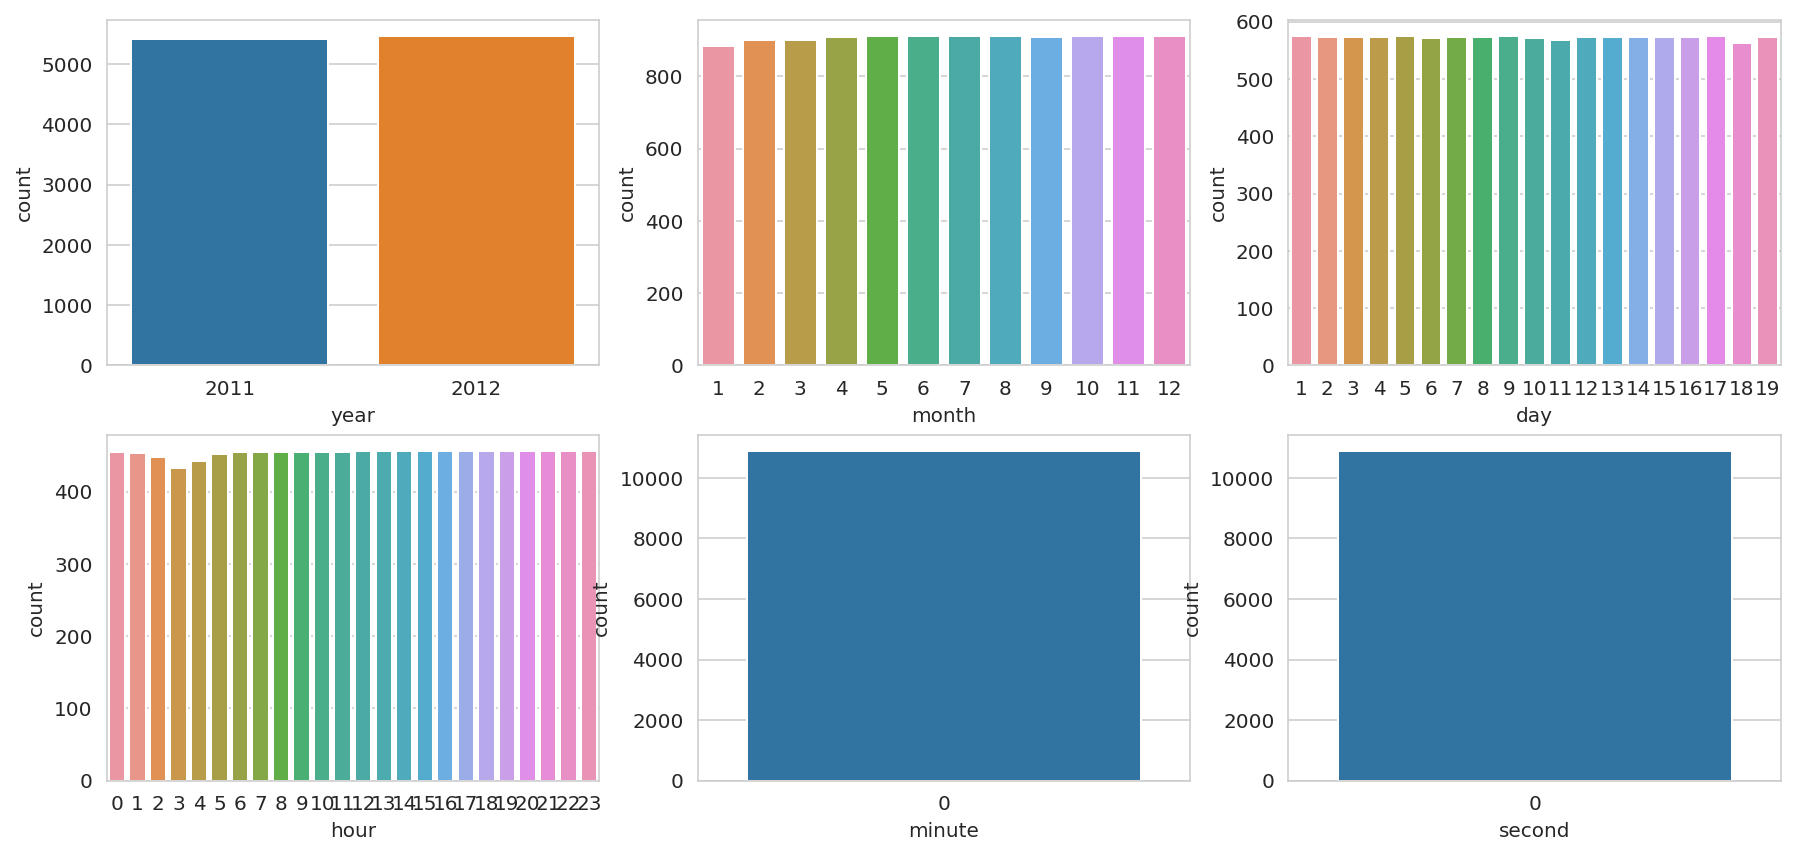

In [ ]:
sns.set_style('whitegrid')


plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(bike['year'])

plt.subplot(2,3,2)
sns.countplot(bike['month'])

plt.subplot(2,3,3)
sns.countplot(bike['day'])

plt.subplot(2,3,4)
sns.countplot(bike['hour'])

plt.subplot(2,3,5)
sns.countplot(bike['minute'])

plt.subplot(2,3,6)
sns.countplot(bike['second'])

plt.show()

year, month, day, hour은 일정한 간격으로 구성되어 있다.
<br/>minute, second는 숫자 0으로만 존재한다.

In [ ]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

결측치는 없다.

In [ ]:
X = bike.drop(['datetime'], axis = 1)
X = X.drop(['minute'], axis = 1)
X = X.drop(['second'], axis = 1)
X = X.drop(['casual'], axis = 1)
X = X.drop(['registered'], axis = 1)
X = X.drop(['count'], axis = 1)
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터를 저장한다.

In [ ]:
y = bike[['count']].values

count 값을 맞추기 위해, y 변수에 count 컬럼의 데이터를 저장한다.

##데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y,           
                                                    test_size=0.2,   
                                                    random_state=1)  

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  8708 , X_test 개수:  2178


입력 데이터와 정답 데이터로 구성하여
<br/>random state으로 데이터를 무작위로 정렬하고
<br/>전체의 20%를 시험 데이터로 사용한다.

## 모델 구성

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

##모델 학습

In [ ]:
y_pred = linear_regression.predict(X_test)                        

y_pred 

array([[183.45804656],
       [ 65.66257346],
       [382.35151225],
       ...,
       [ 67.21021625],
       [277.56414586],
       [161.73883052]])

학습된 모델에 X_test를 입력해서 예측값 출력하기

In [ ]:
y_test

array([[308],
       [ 14],
       [539],
       ...,
       [ 52],
       [244],
       [213]])

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MSE

21092.839012893834

오차(Error)를 제곱(Square)해서 평균(Mean)한 값으로 21092.84이다.

In [ ]:
RMSE = MSE**0.5
RMSE

145.2337392374576

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 145.23이다.

##시각화

In [ ]:
X_test_df = X_test
X_test_df['y_pred'] = y_pred
X_test_df['y_test'] = y_test

In [ ]:
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,y_pred,y_test
3709,3,1,0,2,28.70,33.335,74,11.0014,2011,9,5,11,183.458047,308
6741,1,0,0,2,17.22,21.210,94,11.0014,2012,3,18,4,65.662573,14
9848,4,0,0,1,26.24,31.060,44,12.9980,2012,10,14,17,382.351512,539
1410,2,0,1,1,31.16,33.335,23,36.9974,2011,4,4,15,313.406088,143
10672,4,0,1,2,16.40,20.455,66,22.0028,2012,12,11,2,172.466294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,3,0,1,1,26.24,28.790,89,0.0000,2012,7,11,5,152.379164,41
4178,4,0,1,1,18.04,21.970,67,15.0013,2011,10,6,3,85.272216,5
221,1,0,1,2,8.20,9.090,40,19.0012,2011,1,10,12,67.210216,52
9725,4,0,1,2,22.14,25.760,64,12.9980,2012,10,9,14,277.564146,244


커널 밀도 추정(kernel density estimation; KDE) 메서드를 사용한다.
<br/> KDE는 커널들을 조립하여 확률밀도함수(probability density function)의 모양을 찾는 비모수 추정 방법이다.
<br/> 커널이란 분포를 나타내는 기본 단위를 말한다.

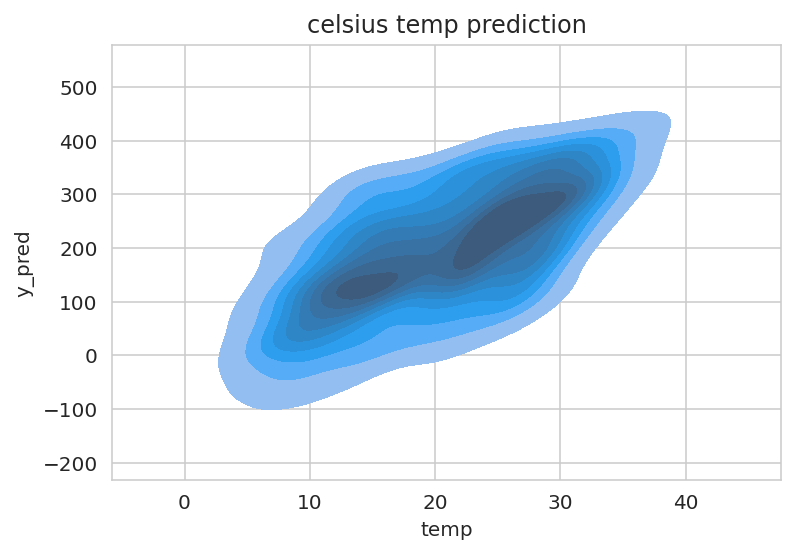

<Figure size 720x576 with 0 Axes>

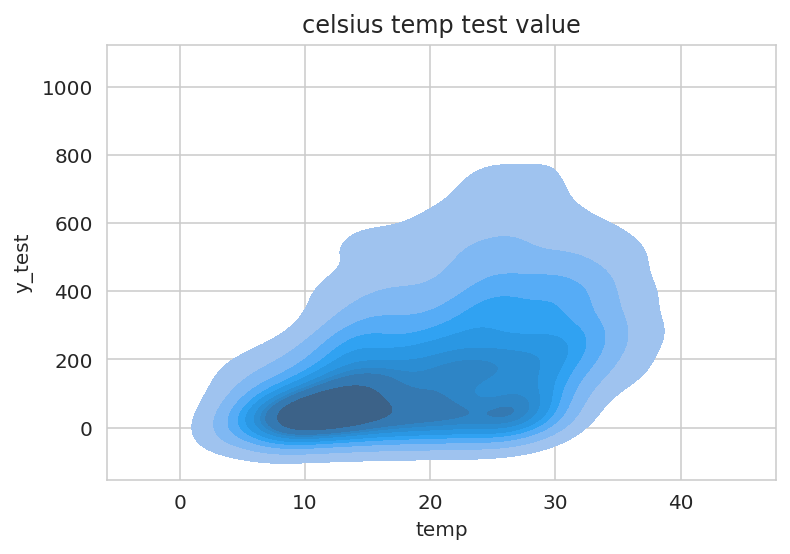

<Figure size 720x576 with 0 Axes>

In [ ]:
ax1 = plt.subplots()
ax1 = sns.kdeplot(data=X_test_df["temp"],
                  data2=X_test_df["y_pred"],
                  shade=True) 
ax1.set_title('celsius temp prediction')
ax1.set_xlabel('temp')
ax1.set_ylabel('y_pred')
plt.figure(figsize = (10,8))


ax2 = plt.subplots()
ax2 = sns.kdeplot(data=X_test_df["temp"],
                  data2=X_test_df["y_test"],
                  shade=True) 
ax2.set_title('celsius temp test value')
ax2.set_xlabel('temp')
ax2.set_ylabel('y_test')
plt.figure(figsize = (10,8))
plt.tight_layout()
plt.show()

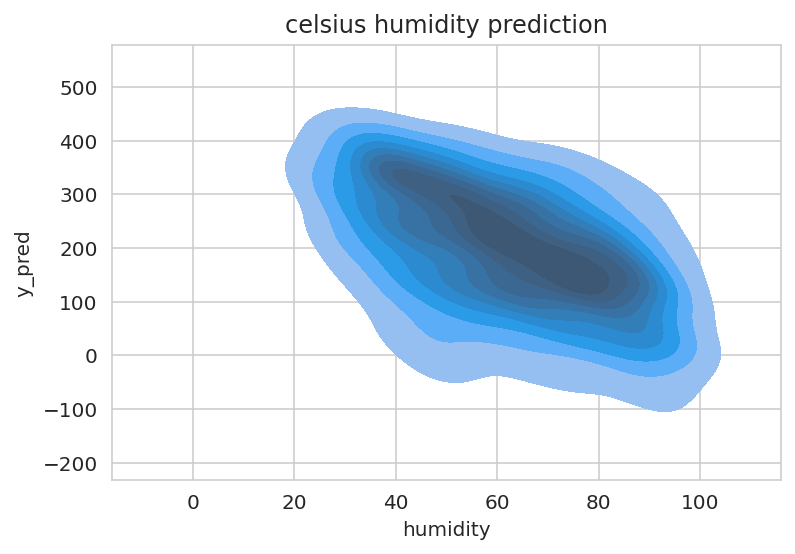

<Figure size 720x576 with 0 Axes>

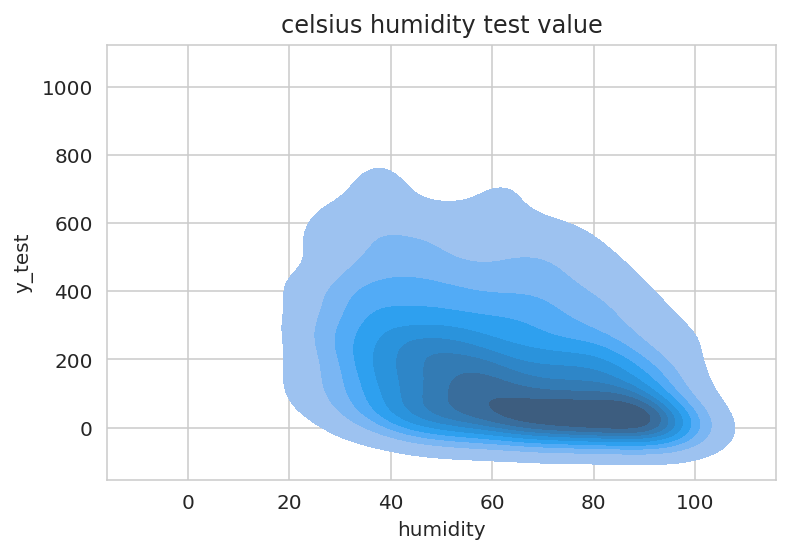

<Figure size 720x576 with 0 Axes>

In [ ]:
ax3 = plt.subplots()
ax3 = sns.kdeplot(data=X_test_df["humidity"],
                  data2=X_test_df["y_pred"],
                  shade=True) 
ax3.set_title('celsius humidity prediction')
ax3.set_xlabel('humidity')
ax3.set_ylabel('y_pred')
plt.figure(figsize = (10,8))


ax4 = plt.subplots()
ax4 = sns.kdeplot(data=X_test_df["humidity"],
                  data2=X_test_df["y_test"],
                  shade=True) 
ax4.set_title('celsius humidity test value')
ax4.set_xlabel('humidity')
ax4.set_ylabel('y_test')
plt.figure(figsize = (10,8))

plt.tight_layout()
plt.show()

#결론

load_diabetes에서 loss값을 계산하기 앞서 파라미터를 설정하며 함수 모델을 만든다.
<br/>Predcitions. MSE. Gradient. Loss 등 여러 함수 모델이 결합하며 파라미터들이 관계를 짓는다.
<br/>여기서 프로그래머의 역할은 각 파라미터들이 어떻게 작동하는지 알고 있어야 하는 것이다.
<br/>기계의 부품이 어떻게 작동하는지 알고 있어야 좋은 성능을 낼 수 있기 때문이다.



이와 관련해 직접 파라미터를 설정했던 경험으로 학습률(learning rate)을 설정하는 알고리즘을 만든 것이다.
<br/>학습률이 0.001부터 0.1까지 차례대로 증가하며 이에 상응하는 손실함수값을 계산하는 알고리즘이다.
<br/>아쉬움이 남는 것은 가중치(W), 상수(b)를 자동으로 초기화하는 부분을 만들지 못한 것이다.
<br/>다른 부분은 자동으로 실행되지만
<br/>가중치와 상수 부분은 수동적으로 초기화값을 입력해주어야한다.
<br/>입력해주지 않으면 for문에서 가중치와 상수 부분이 변해서 값을 고정시킬 수 없다.

#참고문헌

**LMS**
<br/>[jeina7](https://github.com/jeina7)

<br/>**공식 사이트**
<br/>[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

<br/>**웹사이트**
<br/>[Matplotlib 여러 개의 그래프 그리기](https://codetorial.net/matplotlib/subplot.html)